In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
# read CSV file, parse 'date' column into DateTime, set 'date' as the df index
#df = pd.read_csv("https://covid.ourworldindata.org/data/who/full_data.csv", parse_dates=['date'], index_col="date")
df = pd.read_csv("data/coronavirus/full_data_2020-03-22.csv", parse_dates=['date'], index_col="date")
#note that the date column label is listed lower than the other column labels, indicating it is the index value
df.head(5)

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0


In [122]:
df.columns

Index(['location', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths'], dtype='object')

Text(0.5, 0, 'Date')

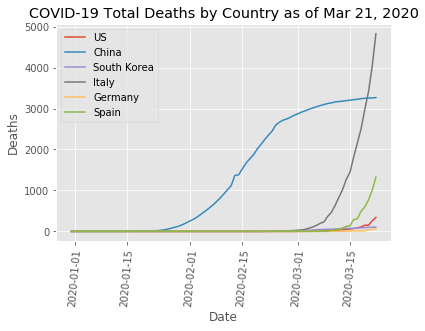

In [192]:
plt.style.use('ggplot')
df_us = df[df.location == "United States"]
df_ch = df[df.location == "China"]
df_sk = df[df.location == "South Korea"]
df_it = df[df.location == "Italy"]
df_ge = df[df.location == "Germany"]
df_sp = df[df.location == "Spain"]
plt.plot(df_us['total_deaths'], label='US')
plt.plot(df_ch['total_deaths'], label='China')
plt.plot(df_sk['total_deaths'], label='South Korea')
plt.plot(df_it['total_deaths'], label='Italy')
plt.plot(df_ge['total_deaths'], label='Germany')
plt.plot(df_sp['total_deaths'], label='Spain')
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Deaths by Country as of Mar 21, 2020')
plt.ylabel('Deaths')
plt.xlabel('Date')
#plt.show()
#plt.savefig('COVID-2020-03-21d.png', bbox_inches='tight', pad_inches=0.2)

Text(0.5, 0, 'Date')

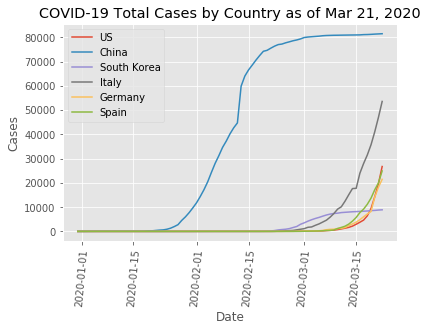

In [210]:
plt.style.use('ggplot')
plt.plot(figsize=(20,20))
plt.plot(df_us['total_cases'], label='US')
plt.plot(df_ch['total_cases'], label='China')
plt.plot(df_sk['total_cases'], label='South Korea')
plt.plot(df_it['total_cases'], label='Italy')
plt.plot(df_ge['total_cases'], label='Germany')
plt.plot(df_sp['total_cases'], label='Spain')
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Cases by Country as of Mar 21, 2020')
plt.ylabel('Cases')
plt.xlabel('Date')

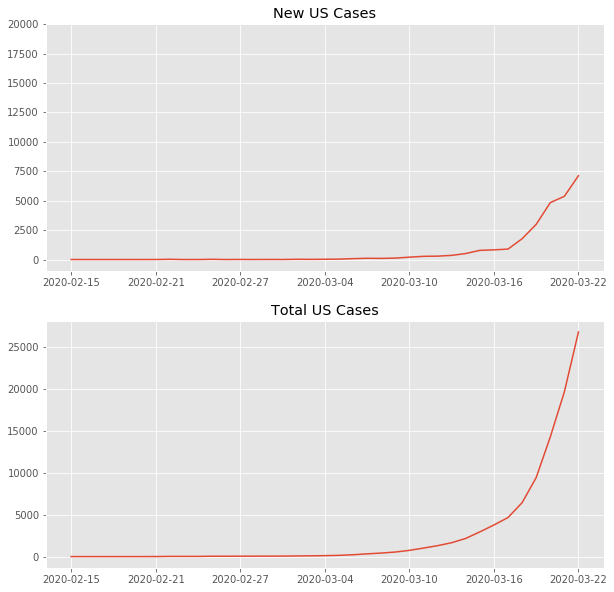

In [207]:
plt.style.use('ggplot')
#select only Feb 15 - Mar 21 data and create new DataFrame, df_mar
df_mar = df["2020-02-15":]
#select only United States data and create new DataFrame, df_us
df_mar_us = df_mar[df_mar.location == "United States"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ax1.plot(df_mar_us.new_cases)
ax1.set_ylim((-1000,20000))
#ax1.xaxis.set_ticks('2020-02-15', '2020-03-15')
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
ax1.set_title('New US Cases')

ax2 = plt.subplot(212)
ax2.plot(df_mar_us.total_cases)
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
ax2.set_title('Total US Cases')

plt.show()

In [197]:
# return multiple columsn for row with the maximum number of new deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['new_deaths'] == df_us['new_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-21,United States,5374,19624,110,260


In [198]:
# return location and new cases for row with the maximum number of total deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['total_deaths'] == df_us['total_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-22,United States,7123,26747,80,340


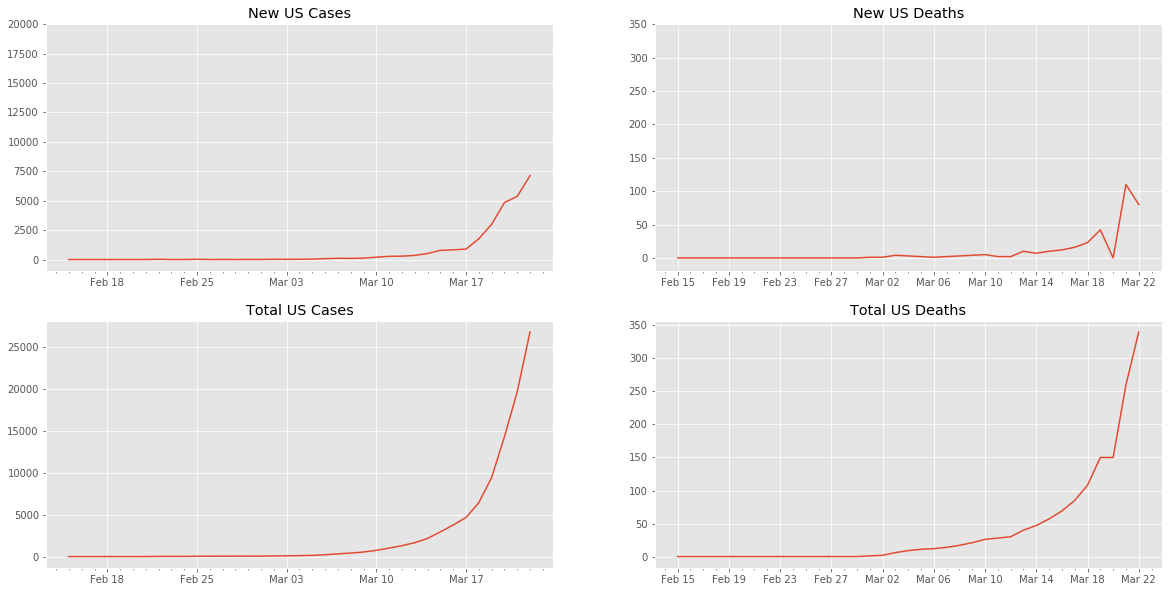

In [229]:
plt.style.use('ggplot')
#select only Feb 15 - end of data and create new DataFrame, df_mar
df_mar = df["2020-02-15":]
#select only United States data and create new DataFrame, df_us
df_mar_us = df_mar[df_mar.location == "United States"]

#create a figure with two rows and two columns of graphs
fig, (axes) = plt.subplots(2, 2, figsize=(20,10))

#new graph in position 1 of 4 in 2x2 figure
ax1 = plt.subplot(221)
#plot 'new_cases' from filter dataframe
ax1.plot(df_mar_us.new_cases)
#set y-limit to match scale of total cases
ax1.set_ylim((-1000,20000))
#set ticks every week
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set major ticks at seven spots
#ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
# set minor ticks at days
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.set_title('New US Cases')

ax2 = plt.subplot(223)
ax2.plot(df_mar_us.total_cases)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
ax2.set_title('Total US Cases')

ax3 = plt.subplot(222)
#ax3.plot(df_mar_us.new_deaths.resample('D').mean())
ax3.plot(df_mar_us.new_deaths)
ax3.set_ylim((-20,350))
#major ticks once a week
#ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
#major ticks every 4 days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax3.xaxis.set_minor_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_title('New US Deaths')

ax4 = plt.subplot(224)
ax4.plot(df_mar_us.total_deaths)
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU, WE)))
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax4.xaxis.set_minor_locator(mdates.DayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_title('Total US Deaths')

plt.show()